<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NBA-Standings-Prediction-w/-Playoff-Simulation" data-toc-modified-id="NBA-Standings-Prediction-w/-Playoff-Simulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NBA Standings Prediction w/ Playoff Simulation</a></span></li><li><span><a href="#Imports,-Loading-Data,-Data-Preprocessing" data-toc-modified-id="Imports,-Loading-Data,-Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports, Loading Data, Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></span></li></ul></li><li><span><a href="#First-Model" data-toc-modified-id="First-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>First Model</a></span><ul class="toc-item"><li><span><a href="#Correlation-Heatmap-(no-variables-dropped)" data-toc-modified-id="Correlation-Heatmap-(no-variables-dropped)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation Heatmap (no variables dropped)</a></span><ul class="toc-item"><li><span><a href="#Multicollinearity---Variables-to-Remove" data-toc-modified-id="Multicollinearity---Variables-to-Remove-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Multicollinearity - Variables to Remove</a></span></li></ul></li><li><span><a href="#Training-the-model" data-toc-modified-id="Training-the-model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Training the model</a></span></li><li><span><a href="#Evaluation-of-model" data-toc-modified-id="Evaluation-of-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evaluation of model</a></span></li><li><span><a href="#Predicted-Wins" data-toc-modified-id="Predicted-Wins-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Predicted Wins</a></span></li></ul></li><li><span><a href="#Second-Model,-less-variables" data-toc-modified-id="Second-Model,-less-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Second Model, less variables</a></span><ul class="toc-item"><li><span><a href="#Correlation-Heatmap-(new-variables)" data-toc-modified-id="Correlation-Heatmap-(new-variables)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlation Heatmap (new variables)</a></span><ul class="toc-item"><li><span><a href="#Analysis-of-new-correlation-map-(put-in-ppt)" data-toc-modified-id="Analysis-of-new-correlation-map-(put-in-ppt)-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Analysis of new correlation map (put in ppt)</a></span></li></ul></li><li><span><a href="#Loading-New-Data" data-toc-modified-id="Loading-New-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loading New Data</a></span></li><li><span><a href="#Training-new-model" data-toc-modified-id="Training-new-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Training new model</a></span></li><li><span><a href="#Evaluation-of-Model" data-toc-modified-id="Evaluation-of-Model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Evaluation of Model</a></span></li><li><span><a href="#Predicted-Wins" data-toc-modified-id="Predicted-Wins-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Predicted Wins</a></span></li><li><span><a href="#Training-model-on-this-year's-data" data-toc-modified-id="Training-model-on-this-year's-data-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Training model on this year's data</a></span></li></ul></li></ul></div>

# NBA Standings Prediction w/ Playoff Simulation

- By: Alex Bzdel
- Email: abzdel@bryant.edu

This notebook uses a very basic linear regression model to predict the 2020-21 NBA Standings. It uses a variety of features and is trained on the 82-game season in 2017-18.

    - The first model uses all variables, just to use as a baseline.

    - The second removes potential multicollinear variables, which improves the performance of the model.
    

The second part of this notebook invoves a Microsoft Excel simulation of the playoffs. That file will be attached to this GitHub repo along with all the data I used here.



# Imports, Loading Data, Data Preprocessing

data sources:
- [2017-18 Team Stats](https://www.nba.com/stats/teams/advanced/?sort=W&dir=-1&Season=2017-18&SeasonType=Regular%20Season)
- [2017-18 Roster Breakdown](https://basketball.realgm.com/nba/transactions/composition_search?custom=4123)
- [2020-21 Team Stats](https://www.nba.com/stats/teams/advanced/?sort=W&dir=-1)
- [2020-21 Roster Breakdown](https://basketball.realgm.com/nba/transactions/composition_search)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

C:\Users\student\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [2]:
df1old = pd.read_csv('2017-18data1.csv')
df2old = pd.read_csv('2017-18data2.csv')

Data Cleaning

In [3]:
df1old = df1old.rename(columns={"TEAM": "Team"})
df1old['Team'] = df1old['Team'].replace(['LA Clippers'],'Los Angeles Clippers')
df2old['Team'] = df1old['Team'].replace(['Philadelphia Sixers'],'Philadelphia 76ers')
df2old = df2old.dropna(axis=1)

In [4]:
dfold = pd.merge(df1old,df2old,on='Team', how='inner') # merging our two dataframes
#df = df.drop('Unnamed: 20', axis=1) # sometimes this column shows up, uncomment this line if you need to

dfold = dfold.drop('MVP', axis=1) # can't decide on MVP until after the season, not a good predictive variable
dfold = dfold.sort_values('Team') # sort by team name for ease of joining predicted values back to the dataframe

# unsure if i need this line yet
#dfvars = dfold.drop(['W', 'Team', 'POSS', 'L', 'Wins', 'Losses', 'Team Achievement'], axis=1).values

# First Model
## Correlation Heatmap (no variables dropped)

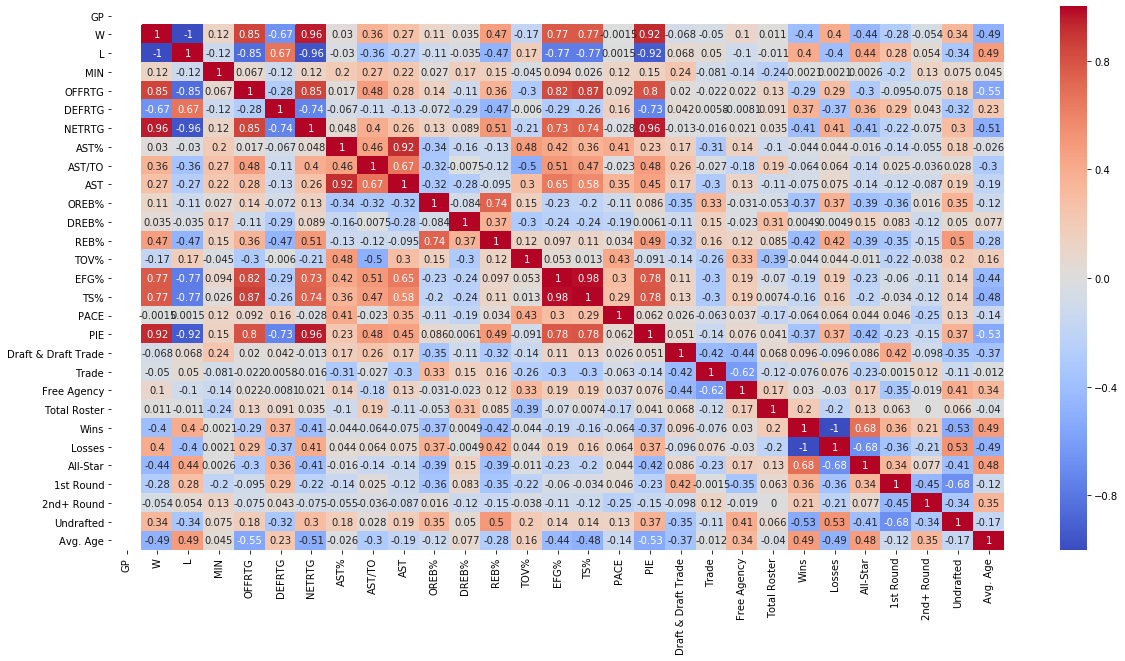

In [5]:
plt.subplots(figsize=(20,10))
sns.heatmap(dfold.corr(), cmap= 'coolwarm', annot=True)

interesting note
   - avg age 65% correlation with wins


### Multicollinearity - Variables to Remove
- MIN 95% w/ GP
    - we'll remove GP since it's less correlated with wins (target)
    
----------------------------------------------------------
- OFFRTG w/ EFG%
    - OFFRTG slightly higher correlated w/ wins, we'll drop EFG%
- OFFRTG w/ TS%
    - same correlation w/ wins, we'll just drop TS%
- OFFRTG w/ PIE
    - PIE more correlated w/ wins
----------------------------------------------------------

- NETRTG w/ PIE
    - PIE less correlated, will be dropped
----------------------------------------------------------

- AST% w/ AST Ratio
    - drop AST%
----------------------------------------------------------

- DEFREB% w/ REB%
- DEFREB% w/ OFFREB%
    - let's keep REB% since it has higher correlation w/ wins than the other two
----------------------------------------------------------
    
-  NETRTG w/ OFFRTG
    - we'll drop OFFRTG since it's less correlated than NETRTG
----------------------------------------------------------


- We'll also drop Losses because it has a high chance of overfitting our model

----------------------------------------------------------

    
FINAL VARIABLES TO DROP: 
These will be dropped in next iteration of the model, for now they'll stay in

- GP
- EFG%
- TS%
- PIE
- AST%
- OREB%
- DREB%
- OFFRTG

## Training the model

In [6]:
X = dfold.drop(['W', 'Team', 'POSS', 'L', 'Wins', 'Losses', 'Team Achievement'], axis=1).values
y = dfold['W'].values

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(f'predicted values: {y_pred}')

model = LinearRegression()
model = LinearRegression().fit(X, y)

predicted values: [ 14.68227465 105.92540309  46.9935854   89.60133269  70.0888045
  67.19255766  60.32195656  43.448111    26.58123721  68.77680274]


## Evaluation of model

In [7]:
lr.fit(x_train, y_train)
print(f'r^2 of our model: {lr.score(x_test, y_test)}')

r^2 of our model: -4.880816045694511


Text(0, 0.5, 'Predicted')

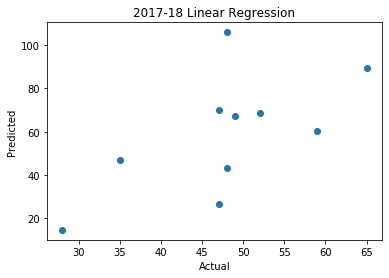

In [8]:
plt.scatter(y_test,y_pred)
plt.title("2017-18 Linear Regression")
plt.xlabel('Actual')
plt.ylabel('Predicted')

As can be seen from our plot above and r^2 value, our model is not yet very good. In the next model, we will remove some potential multicollinearity to improve the model's performance.

## Predicted Wins

In [9]:
y_pred = ([math.floor(a) for a in y_pred])

In [10]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
pred_y_df

# will show us the predicted values for each team on our new data

,Actual Value,Predicted value,Difference
0,28,14,14
1,48,105,-57
2,35,46,-11
3,65,89,-24
4,47,70,-23
5,49,67,-18
6,59,60,-1
7,48,43,5
8,47,26,21
9,52,68,-16


# Second Model, less variables

As a refresher, we'll drop the following:

- GP
- EFG%
- TS%
- PIE
- AST%
- OREB%
- DREB%
- OFFRTG
- DEFRTG (highly negatively correlated)

## Correlation Heatmap (new variables)

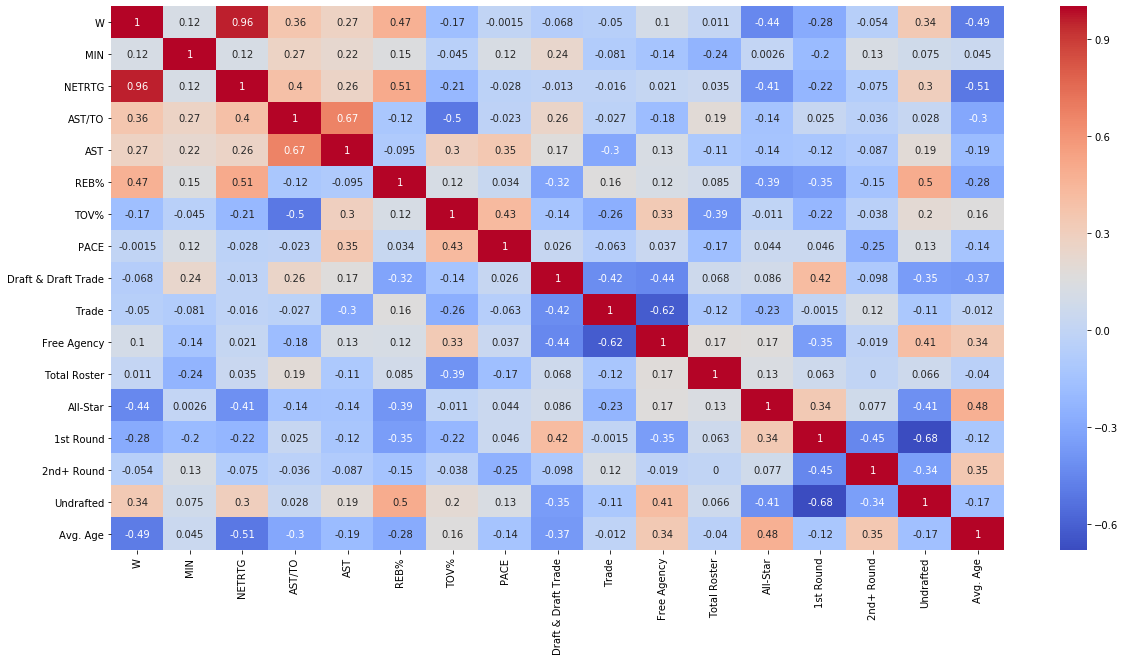

In [11]:
new_model_df = dfold.drop(['Team', 'POSS', 'L', 'Wins', 'Losses', 'GP',
                       'EFG%', 'TS%', 'PIE', 'AST%', 'OREB%', 'DREB%', 'OFFRTG', 'DEFRTG'], axis=1)

plt.subplots(figsize=(20,10))
sns.heatmap(new_model_df.corr(), cmap= 'coolwarm', annot=True)

### Analysis of new correlation map (put in ppt)

My thought is that NETRTG is one of our strongest predictors as it's so highly correlated with wins (94%). REB% (62%), Free Agency Signings (46%), and Avg. Age (57%) should also play a large role.

## Loading New Data

In [12]:
df1new = pd.read_csv('2020-21data1.csv')
df2new = pd.read_csv('2020-21data2.csv')

Data Cleaning

In [13]:
df1new = df1new.rename(columns={"TEAM": "Team"})
df1new['Team'] = df1new['Team'].replace(['LA Clippers'],'Los Angeles Clippers')
df2new['Team'] = df1new['Team'].replace(['Philadelphia Sixers'],'Philadelphia 76ers')

In [14]:
dfnew = pd.merge(df1new,df2new,on='Team', how='inner')
#df = df.drop('Unnamed: 20', axis=1)

# clean the same way as our old data
dfnew = dfnew.drop('MVP', axis=1)
dfnew = dfnew.sort_values('Team')

In [15]:
test = lr.predict(X)
print(test)

[ 24.          55.          14.68227465  36.          27.
  50.          24.          46.          39.          58.
  89.60133269  43.448111    42.          46.9935854   22.
  44.          44.          26.58123721  48.          29.
  48.          25.          68.77680274  21.          67.19255766
  27.          70.0888045   60.32195656 105.92540309  43.        ]


## Training new model

In [16]:
X = dfold.drop(['Team', 'POSS', 'L', 'Wins', 'Losses', 'GP',
            'EFG%', 'TS%', 'PIE', 'AST%', 'OREB%', 'DREB%', 'OFFRTG', 'Team Achievement', 'DEFRTG'], axis=1).values
y = dfold['W'].values

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(f'predicted values: {y_pred}')

model = LinearRegression()
#model.fit(X, y) # idk if i need this too yet
model = LinearRegression().fit(X, y)

predicted values: [28. 48. 35. 65. 47. 49. 59. 48. 47. 52.]


## Evaluation of Model

In [17]:
lr.fit(x_train, y_train)
print(f'r^2 of our model: {lr.score(x_test, y_test)}') # r^2 of our model (why so high?? may be overfitting)

r^2 of our model: 1.0


Text(0, 0.5, 'Predicted')

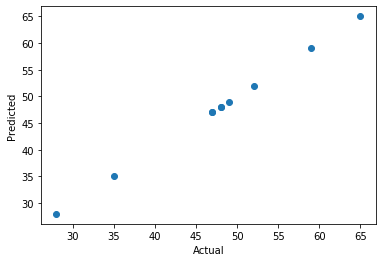

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

## Predicted Wins

In [19]:
y_pred = ([math.floor(a) for a in y_pred])

In [20]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
pred_y_df

,Actual Value,Predicted value,Difference
0,28,28,0
1,48,48,0
2,35,35,0
3,65,65,0
4,47,47,0
5,49,49,0
6,59,59,0
7,48,48,0
8,47,47,0
9,52,52,0


## Training model on this year's data

In [21]:
X = dfold.drop(['Team', 'POSS', 'L', 'Wins', 'Losses', 'GP',
            'EFG%', 'TS%', 'PIE', 'AST%', 'OREB%', 'DREB%', 'OFFRTG', 'Team Achievement', 'DEFRTG'], axis=1).values
test = lr.predict(X)

In [22]:
dfnew['pred_wins'] = list(test) # add to dataframe
# these values will be off since we're now training on an 82 game season

In [25]:
dfnew =dfnew.drop(columns={'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18'}) # not sure why these values are showing up, we'll just drop them as they aren't significant

In [26]:
dfnew.head() # final dataframe, contains predicted wins.
# This will be used for our simulation in Excel

,Team,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,...,Free Agency,Total Roster,Wins,Losses,All-Star,1st Round,2nd+ Round,Undrafted,Avg. Age,pred_wins
9,Atlanta Hawks,63,34,29,3049,113.6,112.3,1.2,59.4,1.80,...,7,15,43,21,1,10,4,1,28.9,24.0
12,Boston Celtics,63,33,30,3039,112.8,111.3,1.5,56.3,1.63,...,4,15,34,29,0,12,2,1,25.7,55.0
3,Brooklyn Nets,62,42,20,3001,117.3,113.0,4.2,62.2,1.95,...,5,15,21,41,0,6,4,5,23.7,28.0
17,Charlotte Hornets,62,30,32,2986,110.4,111.8,-1.4,67.3,1.78,...,5,14,28,34,0,7,5,2,26.4,36.0
21,Chicago Bulls,62,26,36,2996,110.6,112.2,-1.6,63.6,1.74,...,4,14,31,31,0,7,3,4,26.3,27.0


In [77]:
dfnew.to_csv('out.csv', index=False) # output to csv, next part will be in excel